# 주성분 분석
## PCA 클래스

In [1]:
# !wget https://bit.ly/fruits_300_data -O fruits_300.npy

In [2]:
import numpy as np # NumPy 라이브러리 불러오기

fruits = np.load('data/fruits_300.npy') # 데이터셋을 불러옵니다.
fruits_2d = fruits.reshape(-1, 100*100) # 각 이미지를 1차원 벡터로 변환합니다.

In [3]:
from sklearn.decomposition import PCA   # PCA 클래스 불러오기

pca = PCA(n_components=50)  # PCA 객체 생성, n_components=50은 50개의 주성분을 추출합니다.
pca.fit(fruits_2d) # PCA 모델을 데이터에 적합시킵니다.

,n_components,50
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [4]:
print(pca.components_.shape) # 주성분의 개수와 각 주성분의 차원을 출력합니다.

(50, 10000)


In [5]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False) # squeeze=False는 1행 또는 1열일 때도 2차원 배열로 만듭니다.
    for i in range(rows):   # 행을 반복합니다.
        for j in range(cols): # 열을 반복합니다.
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r') # 이미지를 회색조로 표시합니다.
            axs[i, j].axis('off') # 축을 표시하지 않습니다.
    plt.show() # 이미지를 표시합니다.

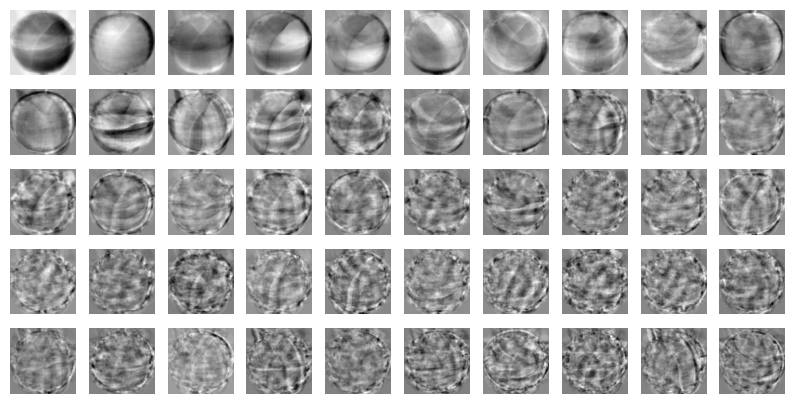

In [6]:
draw_fruits(pca.components_.reshape(-1, 100, 100)) # 주성분을 이미지로 표시합니다. 각 주성분은 100x100 크기의 이미지입니다.

In [7]:
print(fruits_2d.shape) # (300, 10000) 
# 300개의 이미지가 있고, 각 이미지는 100x100 크기입니다. 이를 1차원 벡터로 변환하여 10000차원으로 만듭니다.

(300, 10000)


In [8]:
fruits_pca = pca.transform(fruits_2d) # PCA를 적용하여 50차원으로 변환합니다.

In [9]:
print(fruits_pca.shape) # (300, 50)
# 300개의 이미지가 있고, 각 이미지는 50차원으로 변환되었습니다

(300, 50)


## 원본 데이터 재구성

In [10]:
fruits_inverse = pca.inverse_transform(fruits_pca) # PCA를 적용한 데이터를 원본 차원으로 재구성합니다.
print(fruits_inverse.shape) # (300, 10000)

(300, 10000)


In [11]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100) # 재구성된 데이터를 원본 이미지 크기로 변환합니다.

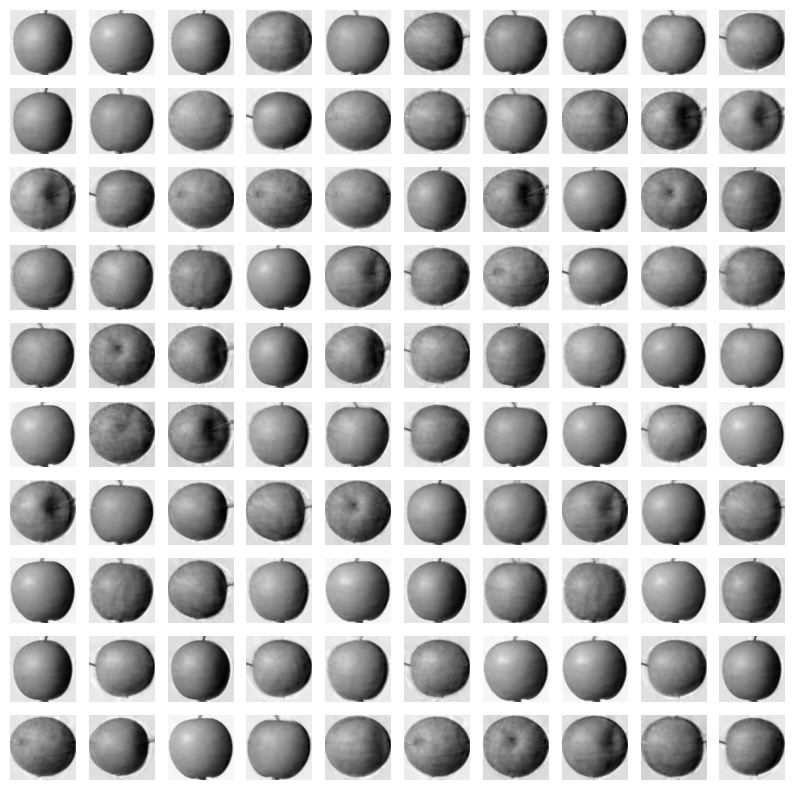

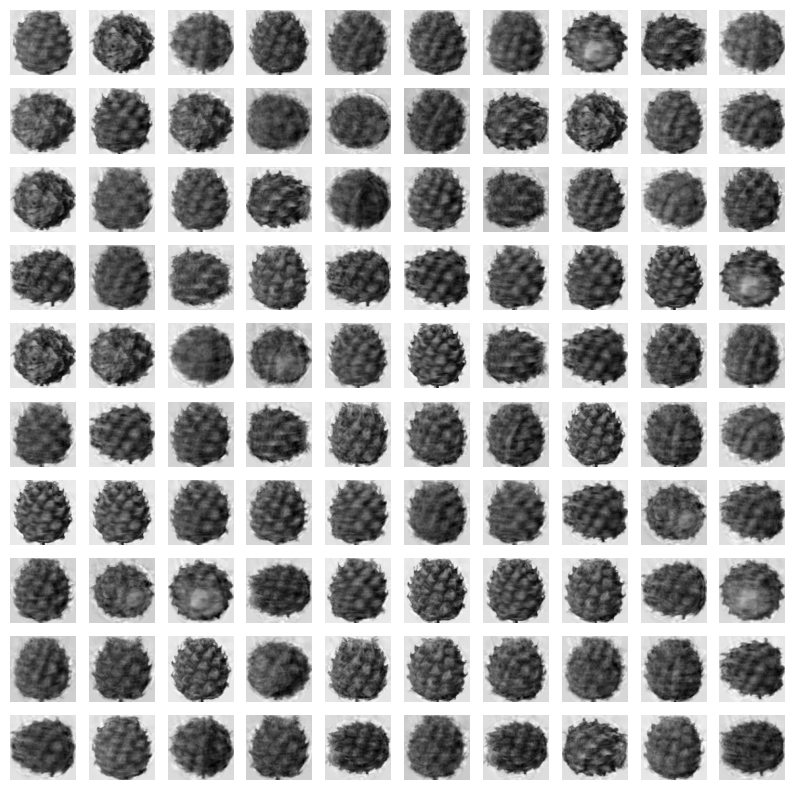

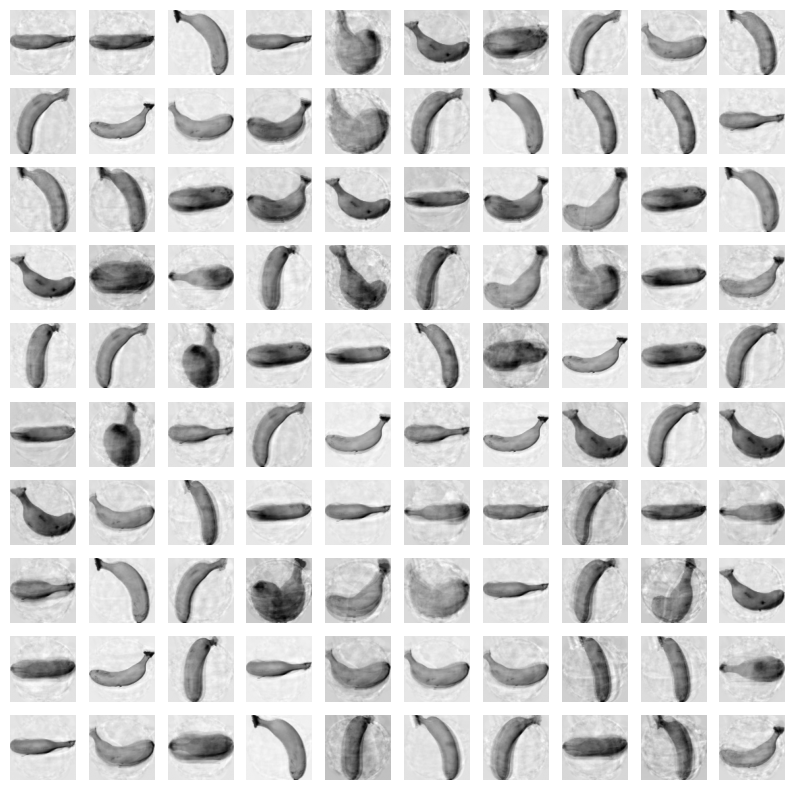

In [12]:
for start in [0, 100, 200]: # 0, 100, 200번째부터 시작하여 100개씩 재구성된 이미지를 표시합니다.
    draw_fruits(fruits_reconstruct[start:start+100]) # 재구성된 이미지를 표시합니다.
    print("\n") # 각 행은 100개의 이미지로 구성되어 있습니다. 각 이미지는 100x100 크기입니다.

## 설명된 분산

In [13]:
print(np.sum(pca.explained_variance_ratio_)) # 설명된 분산의 합을 출력합니다.

0.9214698519368706


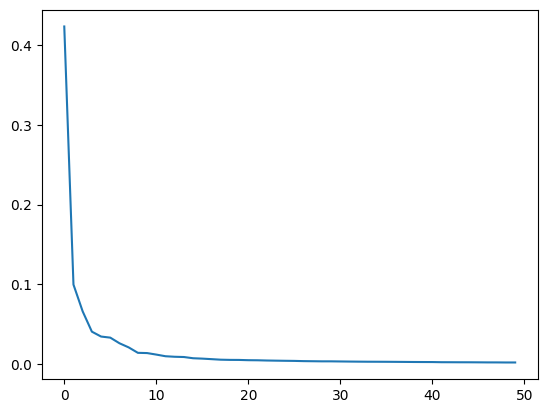

In [14]:
plt.plot(pca.explained_variance_ratio_) # 각 주성분이 설명하는 분산의 비율을 그래프로 표시합니다.

## 다른 알고리즘과 함께 사용하기

In [ ]:
from sklearn.linear_model import LogisticRegression # Logistic Regression 모델을 불러옵니다.

lr = LogisticRegression(max_iter=1000) # 로지스틱 회귀 모델 생성 (최대 반복 횟수를 1000으로 증가)

In [17]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100) # 각 클래스의 레이블을 생성합니다. 

In [18]:
from sklearn.model_selection import cross_validate # 교차 검증을 위한 함수 불러오기

scores = cross_validate(lr, fruits_2d, target) # 로지스틱 회귀 모델을 데이터에 적합시키고 교차 검증을 수행합니다.
print(np.mean(scores['test_score'])) # 교차 검증의 평균 정확도를 출력합니다.
print(np.mean(scores['fit_time'])) # 모델 학습에 걸린 평균 시간을 출력합니다.

0.9966666666666667
0.274688196182251


In [19]:
scores = cross_validate(lr, fruits_pca, target) # PCA를 적용한 데이터에 대해 로지스틱 회귀 모델을 교차 검증합니다.
print(np.mean(scores['test_score'])) # PCA를 적용한 데이터의 평균 정확도를 출력합니다.
print(np.mean(scores['fit_time'])) # PCA를 적용한 데이터의 모델 학습에 걸린 평균 시간을 출력합니다.

0.9966666666666667
0.01764364242553711


In [20]:
pca = PCA(n_components=0.5) # 설명된 분산의 비율이 50% 이상인 주성분을 선택합니다.
pca.fit(fruits_2d) # PCA 모델을 데이터에 적합시킵니다.

,n_components,0.5
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [21]:
print(pca.n_components_) # 선택된 주성분의 개수를 출력합니다.

2


In [22]:
fruits_pca = pca.transform(fruits_2d) # PCA를 적용하여 데이터의 차원을 축소합니다.
print(fruits_pca.shape)

(300, 2)


In [24]:
# scores = cross_validate(lr, fruits_pca, target) # PCA를 적용한 데이터에 대해 로지스틱 회귀 모델을 교차 검증합니다.
# print(np.mean(scores['test_score'])) # PCA를 적용한 데이터의 평균 정확도를 출력합니다.
# print(np.mean(scores['fit_time'])) # PCA를 적용한 데이터의 모델 학습에 걸린 평균 시간을 출력합니다.

## ConvergenceWarning 해결 방법들

위의 코드에서 ConvergenceWarning이 발생할 수 있습니다. 이를 해결하는 방법들:

1. **max_iter 증가**: 기본값 100을 더 큰 값으로 설정
2. **데이터 스케일링**: StandardScaler 또는 MinMaxScaler 사용
3. **다른 solver 사용**: 'liblinear', 'saga' 등
4. **정규화 강도 조정**: C 매개변수 조정

In [25]:
# 대안 1: 데이터 스케일링과 함께 사용
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 파이프라인을 사용하여 스케일링과 로지스틱 회귀를 연결
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000))
])

# 파이프라인을 사용한 교차 검증
scores_scaled = cross_validate(pipeline, fruits_pca, target)
print("스케일링 적용 후 정확도:", np.mean(scores_scaled['test_score']))
print("스케일링 적용 후 학습 시간:", np.mean(scores_scaled['fit_time']))

스케일링 적용 후 정확도: 0.9866666666666667
스케일링 적용 후 학습 시간: 0.00762629508972168


In [28]:
# 대안 2: 다중 클래스 분류에 적합한 solver들 사용
print("=== 다양한 solver 비교 ===")

# 1. lbfgs solver (기본값, 다중 클래스 분류에 적합)
lr_lbfgs = LogisticRegression(solver='lbfgs', max_iter=1000)
scores_lbfgs = cross_validate(lr_lbfgs, fruits_pca, target)
print("lbfgs solver 정확도:", np.mean(scores_lbfgs['test_score']))
print("lbfgs solver 학습 시간:", np.mean(scores_lbfgs['fit_time']))

# # 2. saga solver (대용량 데이터에 적합)
# lr_saga = LogisticRegression(solver='saga', max_iter=1000)
# scores_saga = cross_validate(lr_saga, fruits_pca, target)
# print("saga solver 정확도:", np.mean(scores_saga['test_score']))
# print("saga solver 학습 시간:", np.mean(scores_saga['fit_time']))

# 3. newton-cg solver (빠른 수렴)
lr_newton = LogisticRegression(solver='newton-cg', max_iter=1000)
scores_newton = cross_validate(lr_newton, fruits_pca, target)
print("newton-cg solver 정확도:", np.mean(scores_newton['test_score']))
print("newton-cg solver 학습 시간:", np.mean(scores_newton['fit_time']))

=== 다양한 solver 비교 ===
lbfgs solver 정확도: 0.9966666666666667
lbfgs solver 학습 시간: 0.04750056266784668
newton-cg solver 정확도: 0.9866666666666667
newton-cg solver 학습 시간: 0.026854801177978515
lbfgs solver 정확도: 0.9966666666666667
lbfgs solver 학습 시간: 0.04750056266784668
newton-cg solver 정확도: 0.9866666666666667
newton-cg solver 학습 시간: 0.026854801177978515


In [29]:
# 대안 3: liblinear solver를 OneVsRestClassifier로 감싸서 사용
from sklearn.multiclass import OneVsRestClassifier

print("\n=== OneVsRestClassifier 사용 ===")
lr_ovr = OneVsRestClassifier(LogisticRegression(solver='liblinear', max_iter=1000))
scores_ovr = cross_validate(lr_ovr, fruits_pca, target)
print("OneVsRestClassifier + liblinear 정확도:", np.mean(scores_ovr['test_score']))
print("OneVsRestClassifier + liblinear 학습 시간:", np.mean(scores_ovr['fit_time']))


=== OneVsRestClassifier 사용 ===
OneVsRestClassifier + liblinear 정확도: 0.99
OneVsRestClassifier + liblinear 학습 시간: 0.005763435363769531


## Solver별 특징 및 권장 사항

### 다중 클래스 분류에 적합한 solver들:

1. **lbfgs** (기본값)
   - 다중 클래스 분류에 최적화
   - 소규모~중간 규모 데이터에 적합
   - 수렴 속도가 빠름

2. **saga**
   - 대용량 데이터에 적합
   - L1, L2 정규화 모두 지원
   - 병렬 처리 가능

3. **newton-cg**
   - 빠른 수렴 속도
   - L2 정규화만 지원
   - 메모리 효율적

### 권장 사항:
- **일반적인 경우**: `lbfgs` (기본값) 사용
- **대용량 데이터**: `saga` 사용
- **빠른 수렴 필요**: `newton-cg` 사용
- **liblinear 사용 시**: `OneVsRestClassifier`로 감싸서 사용

In [31]:
from sklearn.cluster import KMeans # KMeans 클러스터링을 위한 클래스 불러오기

km = KMeans(n_clusters=3, random_state=42) # KMeans 클러스터링 모델 생성
km.fit(fruits_pca) # PCA를 적용한 데이터에 KMeans 클러스터링을 적용합니다.

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [32]:
print(np.unique(km.labels_, return_counts=True))  # 클러스터링 결과의 레이블과 각 레이블의 개수를 출력합니다.

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


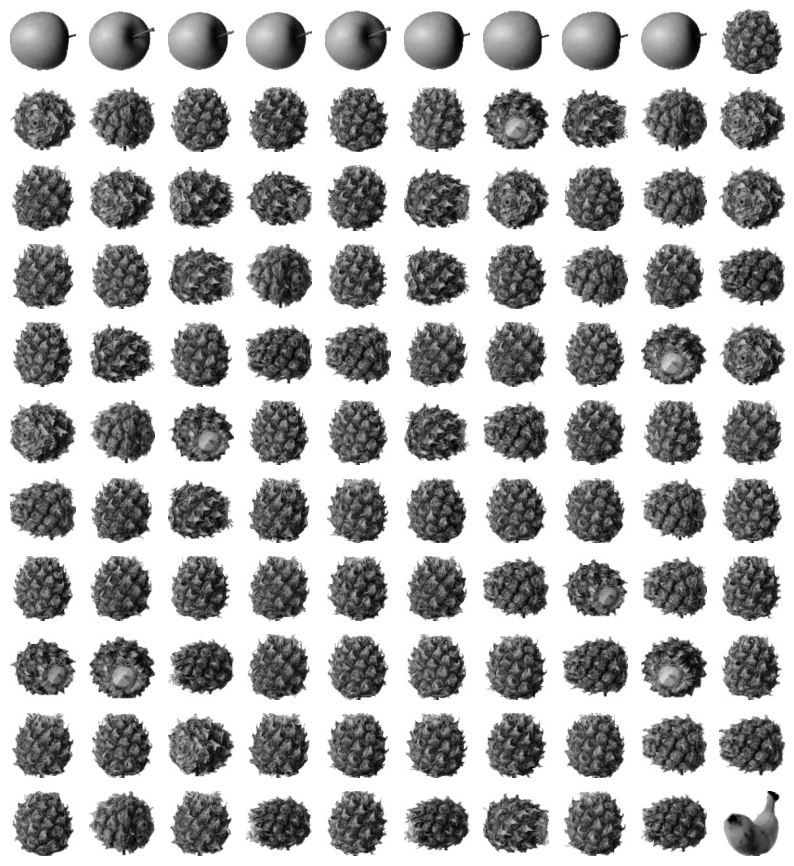

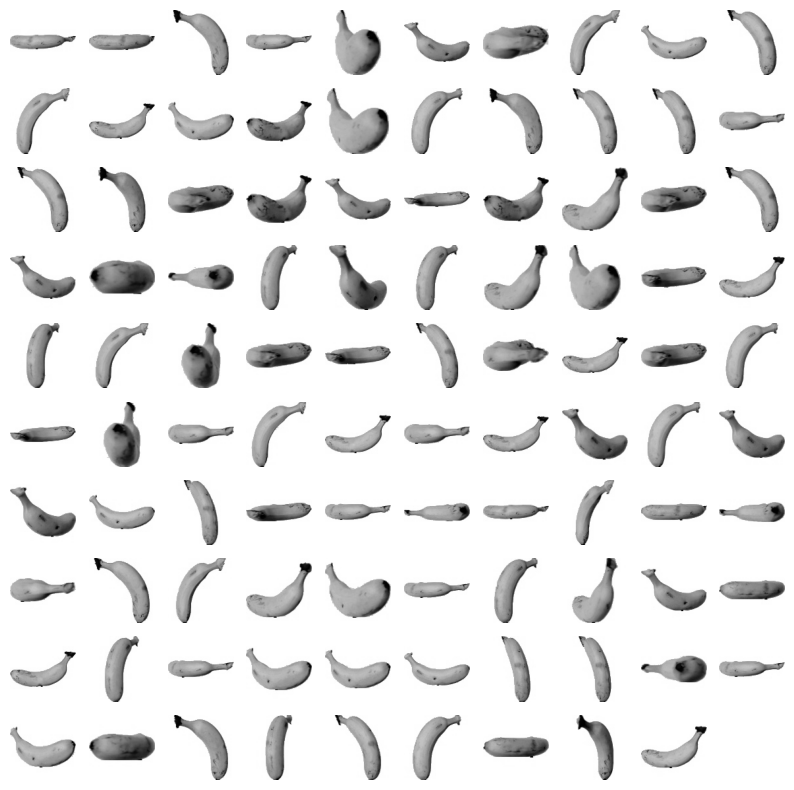

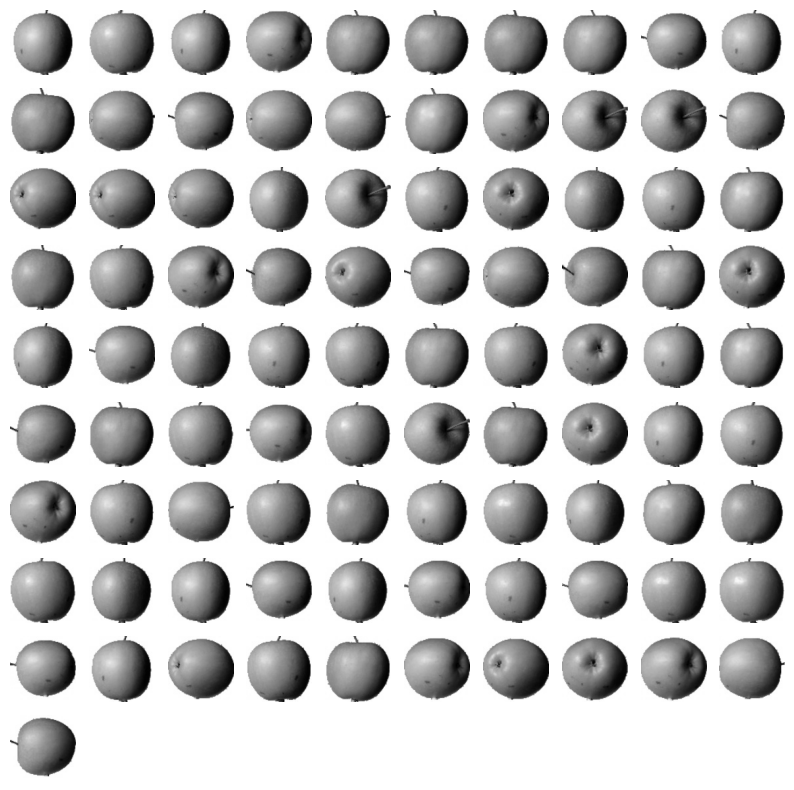

In [33]:
for label in range(0, 3): # 각 클러스터 레이블에 대해 반복합니다.
    draw_fruits(fruits[km.labels_ == label]) # 클러스터링된 각 레이블에 해당하는 과일 이미지를 표시합니다.
    print("\n") # 각 행은 100개의 이미지로 구성되어 있습니다. 각 이미지는 100x100 크기입니다.

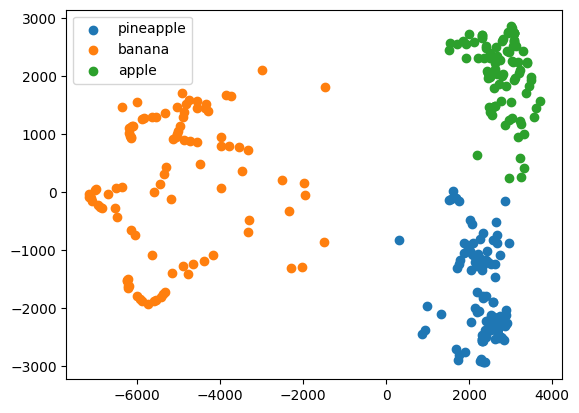

In [34]:
for label in range(0, 3): # 각 클러스터 레이블에 대해 반복합니다.
    data = fruits_pca[km.labels_ == label] # 클러스터링된 데이터에서 해당 레이블의 데이터를 선택합니다.
    plt.scatter(data[:,0], data[:,1]) # 각 클러스터의 데이터를 2차원 평면에 산점도로 표시합니다.
plt.legend(['pineapple', 'banana', 'apple']) # 범례를 추가하여 각 클러스터의 레이블을 표시합니다.
plt.show() # plt.show() # 산점도를 표시합니다.